<img src="analyse-de-données.jpg"  alt="Nature" class="responsive" align: center/>


In [1]:

# Manipulaion de données
import functions as f
import locale
import pandas as pd
import numpy as np

# Test statistique
from scipy import sqrt
import scipy.stats as stats
from scipy.stats import t,pearsonr,levene
from statistics import variance, mean

# Visualisation de données
import seaborn as sns
import seaborn.objects as so
import altair as alt
import matplotlib.pyplot as plt

# Visualisation de données manquantes
import missingno as msno

# Filtre d'avertissement
import warnings
warnings.simplefilter("ignore")

# Manipulation et formatage pour l'affichage date et heure
from datetime import datetime, date, time, timezone
locale.setlocale(locale.LC_ALL, 'fr_FR.utf8')




'fr_FR.utf8'

## SOMMAIRE <span id='sommaire'>

- [Demande d'Antoine : Analyse de données](#ant)
    - [Le chiffre d'affaire et le volume](#ca-vol)
    - [Moyenne mobile](#mb)
    - [Anomalie octobre 2021](#mo)
    - [Les Top et les Flops des produits](#tf)
    - [Les catégories de produits](#cp)
    - [Profils clients](#pc)
    - [Courbe de Lorentz](#cl)
   
   
- [Demande de Julie : Test statistique ](#jul)
    - [Y a-t-il un lien entre le sexe des clients et les catégories de produits achetés ?](#q1)
    - Y a-t-il un lien entre l'âge des clients et :
        - [le montant total des achats](#q2)
        - [la fréquence d’achat (ie. nombre d'achats par mois par exemple)](#q3)
        - [la taille du panier moyen (en nombre d’articles)](#q4)
        - [les catégories de produits achetés](#q5)

In [2]:
# fichier des clients
final_file = pd.read_csv("csv_final/dataframe.csv")


In [3]:
final_file


,id_prod,date,price,categ,client_id,sex,age,session_id,day,month,year
0,0_1421,2021-04-17,19.99,0,c_5152,f,37,s_21727,17,4,2021
1,0_1421,2021-11-24,19.99,0,c_2167,f,63,s_124134,24,11,2021
2,0_1421,2022-08-24,19.99,0,c_2167,f,63,s_257560,24,8,2022
3,0_1421,2021-04-06,19.99,0,c_3060,m,52,s_16742,6,4,2021
4,0_1421,2022-03-06,19.99,0,c_3060,m,52,s_175117,6,3,2022
...,...,...,...,...,...,...,...,...,...,...,...
677468,1_140,2021-12-09,38.56,1,c_7406,m,35,s_131828,9,12,2021
677469,0_1920,2023-01-30,25.16,0,c_7748,f,34,s_334324,30,1,2023
677470,0_1920,2021-05-30,25.16,0,c_7748,f,34,s_41465,30,5,2021
677471,0_1920,2022-12-30,25.16,0,c_7748,f,34,s_319303,30,12,2022


# Analyse ( Demande d'Antoine) <a id="ant" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

- Dans un premier temps, je vais avoir besoin de différents indicateurs et graphiques autour du chiffre d'affaires. Peux-tu également regarder l’évolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale ? 
- Faire un zoom sur les références, pour voir un peu les tops et les flops, la répartition par catégorie, etc. 
- quelques informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz. 
 
- Toutes les informations et tous graphiques qui apporteraient de l’information pertinente sont les bienvenus 

### Calcul du CA, différents indicateurs et analyse dans le temps <a id="ca-vol" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

#### Affichage du chiffre d'affaire par an

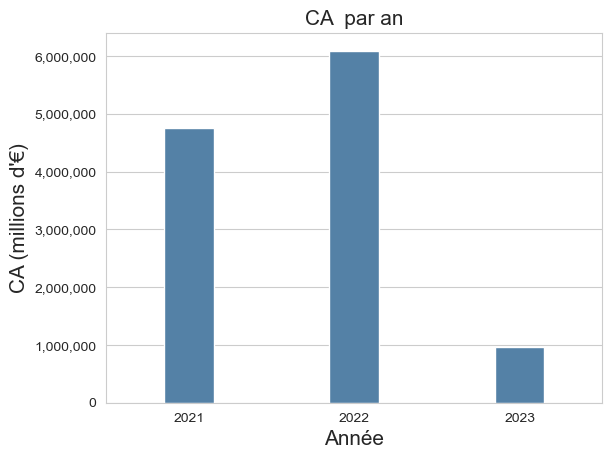

,year,price
0,2021,4758412.18
1,2022,6089948.21
2,2023,971119.51


In [4]:
#Création du dataframe en regroupant par année le CA
df0 = final_file.groupby('year', as_index=False)['price'].sum()

#création du graphique
sns.set_style("whitegrid")
sns.barplot( x="year", y="price",data=df0, color="steelblue", width=0.3)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('CA  par an', fontsize='15')
plt.xlabel("Année", fontsize='15')
plt.ylabel("CA (millions d'€)", fontsize='15')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
df0

#### Evolution chiffre d'affaire par an et par catégorie

In [5]:
#Création du dataframe en regroupant par année et catégorie le CA
df1 = final_file.groupby(['categ', 'year'], as_index=False)['price'].sum()

#Création du graphique
alt.Chart(df1).mark_line(size=5).encode(
    x=alt.X('year:N', axis=alt.Axis(title='year')),
    y=alt.Y('price', axis=alt.Axis(title='CA en euros')),
    color=alt.Color('categ:N', title='Catégorie')
).properties(title="CA par an et catégorie", width=600)


alt.Chart(...)

#### Chiffre d'affaire mensuel par catégorie sur 3 ans

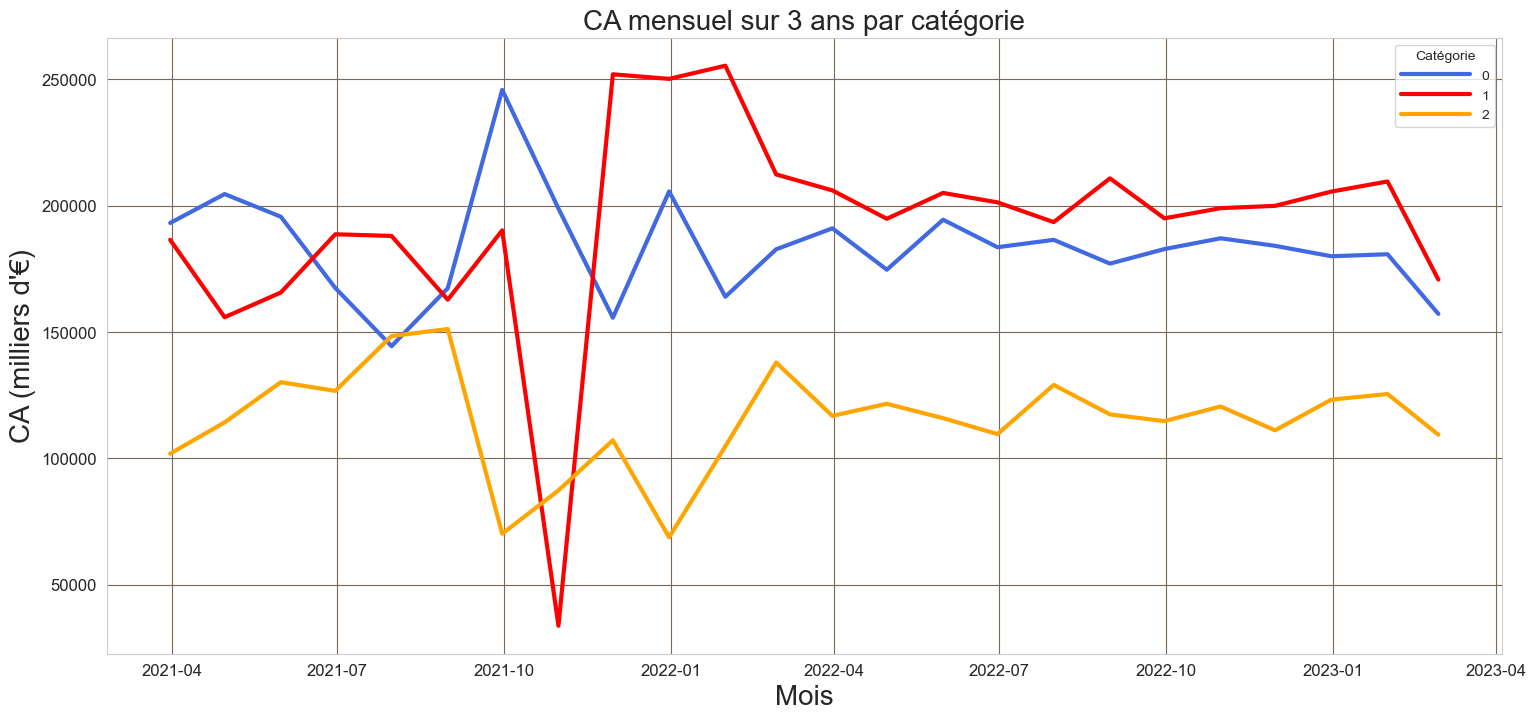

In [6]:
#Plage des dates
debut_date = '2021-01-01'
fin_date = '2023-02-28'
#Création d'une colonne dates manipulable 
final_file['dates'] = pd.to_datetime(final_file['date'])

#Création des dataframes en regroupant les dates par mois et catégories le CA
df2 = final_file.query('dates > @debut_date and dates < @fin_date and categ==0').set_index(
    "dates").groupby(pd.Grouper(freq="M")).sum()
df3 = final_file.query('dates > @debut_date and dates < @fin_date and categ==1').set_index(
    "dates").groupby(pd.Grouper(freq="M")).sum()
df4 = final_file.query('dates > @debut_date and dates < @fin_date and categ==2').set_index(
    "dates").groupby(pd.Grouper(freq="M")).sum()

 #Création du graphique   
sns.set_style("whitegrid")
plt.figure(figsize=(18, 8))
sns.lineplot(data=df2, x='dates', y='price',
             label="0", linewidth=3, color="royalblue")
sns.lineplot(data=df3, x='dates', y='price',
             label="1", linewidth=3, color="red")
sns.lineplot(data=df4, x='dates', y='price',
             label="2", linewidth=3, color="orange")
plt.title('CA mensuel sur 3 ans par catégorie', fontsize='20')
plt.xlabel("Mois", fontsize='20')
plt.ylabel("CA (milliers d'€)", fontsize='20')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Catégorie", handlelength=5)
plt.grid(color='#7A6755')

plt.show()


#### Volume mensuel par catégorie sur 3 ans

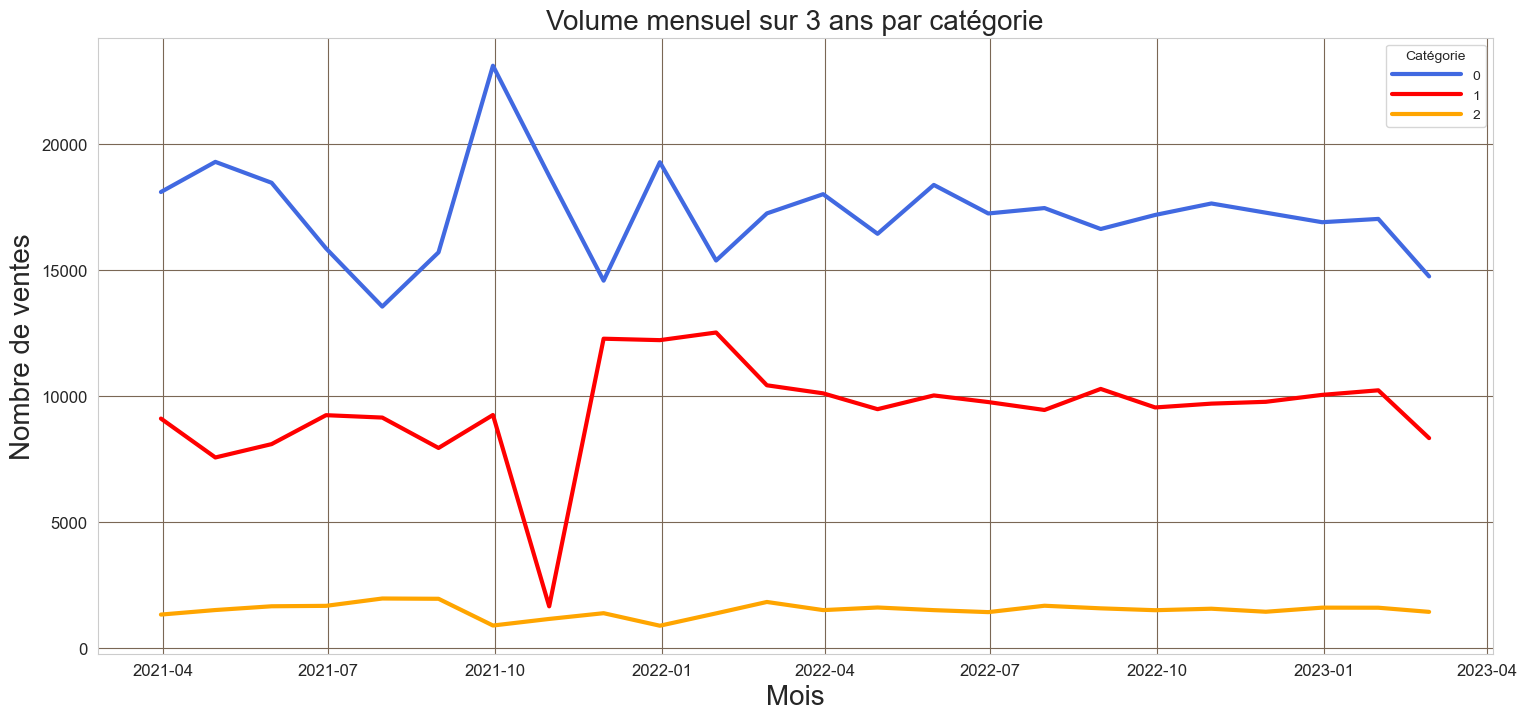

In [7]:

#Création des dataframes en regroupant les dates par mois et catégories le nombre de produit vendu
df5 = final_file.query('dates > @debut_date and dates < @fin_date and categ==0').set_index(
    "dates").groupby(pd.Grouper(freq="M")).count()
df6 = final_file.query('dates > @debut_date and dates < @fin_date and categ==1').set_index(
    "dates").groupby(pd.Grouper(freq="M")).count()
df7 = final_file.query('dates > @debut_date and dates < @fin_date and categ==2').set_index(
    "dates").groupby(pd.Grouper(freq="M")).count()

#Création du graphique
plt.figure(figsize=(18, 8))
sns.lineplot(data=df5, x='dates', y='price',
             label="0", linewidth=3, color="royalblue")
sns.lineplot(data=df6, x='dates', y='price',
             label="1", linewidth=3, color="red")
sns.lineplot(data=df7, x='dates', y='price',
             label="2", linewidth=3, color="orange")
plt.title('Volume mensuel sur 3 ans par catégorie', fontsize='20')
plt.xlabel("Mois", fontsize='20')
plt.ylabel("Nombre de ventes", fontsize='20')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Catégorie", handlelength=5)
plt.grid(color='#7A6755')

plt.show()


In [8]:

df8 = final_file.query('dates > @debut_date and dates < @fin_date')
Nb_vente_3ans = df8.groupby(['dates', 'categ'], as_index=False)[
    'session_id'].count()
    
#Création du graphique
alt.Chart(Nb_vente_3ans).mark_bar().encode(
    x=alt.X('yearmonth(dates)', axis=alt.Axis(title='Mois')),
    y=alt.Y('session_id', axis=alt.Axis(title='volume')),
    color=alt.Color('categ:N', title='Catégorie')
).properties(title="Nombre de vente sur 3ans par catégorie", width=700)


alt.Chart(...)

#### Chiffre d'affaire journalier sur 3 ans

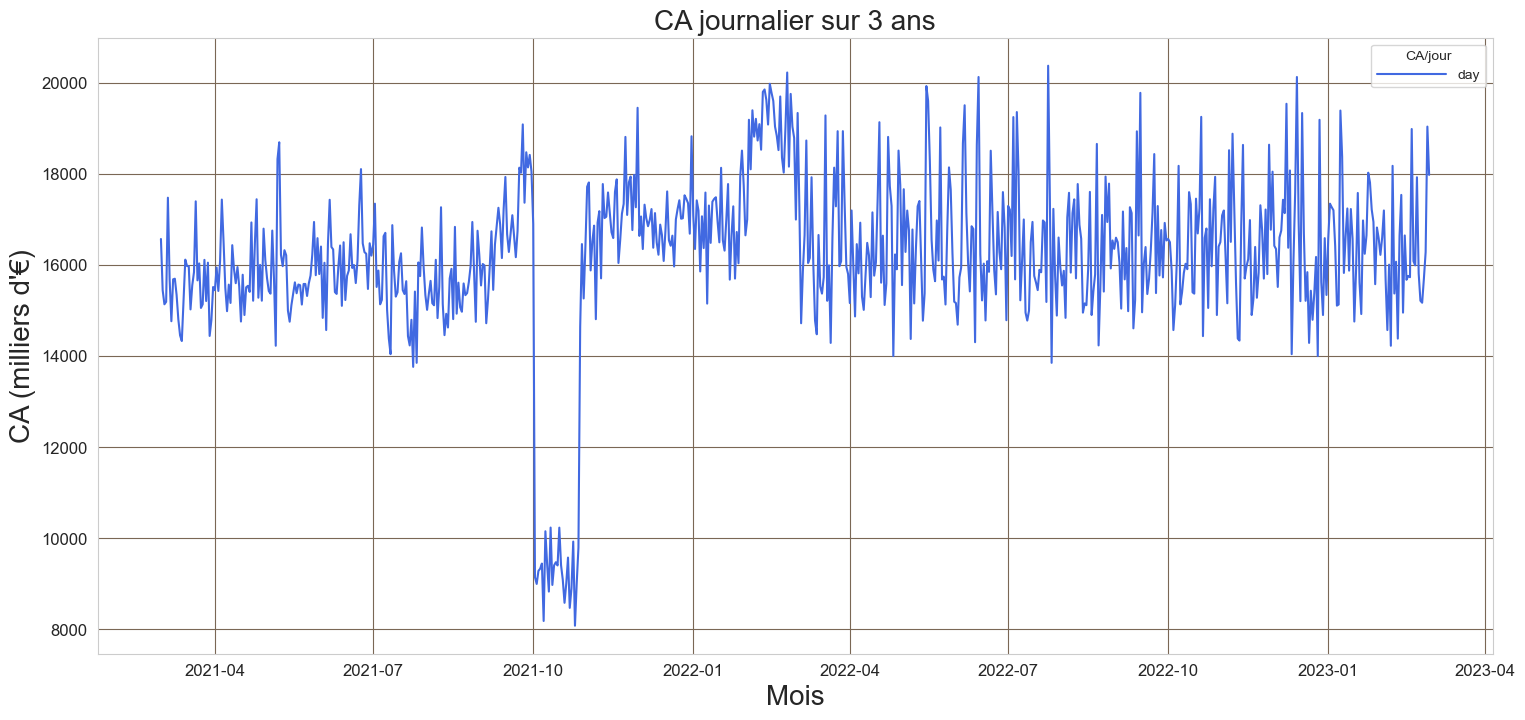

In [9]:
#Création du dataframe regroupant par dates et CA journalier
ca_quotidien_3ans = final_file[["price", "dates"]].set_index(
    "dates").groupby(pd.Grouper(freq="D")).sum()

#Création d'un graphique    
plt.figure(figsize=(18, 8))
plt.plot(ca_quotidien_3ans, label='day', color='royalblue')
plt.title('CA journalier sur 3 ans', fontsize='20')
plt.xlabel("Mois", fontsize='20')
plt.ylabel("CA (milliers d'€)", fontsize='20')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(color='#7A6755')
plt.legend(title="CA/jour", handlelength=5)

plt.show()



#### Recherche de la baisse d'activité entre les mois de Septembre et Novembre 2021

In [10]:
#Plage des dates
debut_date = '2021-09-01'
fin_date = '2021-11-30'
#Création d'un dataframe regroupant le CA par catégorie sur 3 mois
df9 = final_file.query('dates > @debut_date and dates < @fin_date')
ca_2021_3mois = df9.groupby(['dates', 'categ'], as_index=False)['price'].sum()

#Création d'un graphique
alt.Chart(ca_2021_3mois).mark_bar().encode(
    x=alt.X('dates', axis=alt.Axis(title='year')),
    y=alt.Y('price', axis=alt.Axis(title='CA en euros')),
    color=alt.Color('categ:N', title='Catégorie')
).properties(title="CA journalier sur 3 mois en 2021 (Septembre/Octobre/Novembre) par jour et catégorie", width=700)


alt.Chart(...)

### Moyenne mobile du chiffre d'affaire par semaine et par mois <a id="mb" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

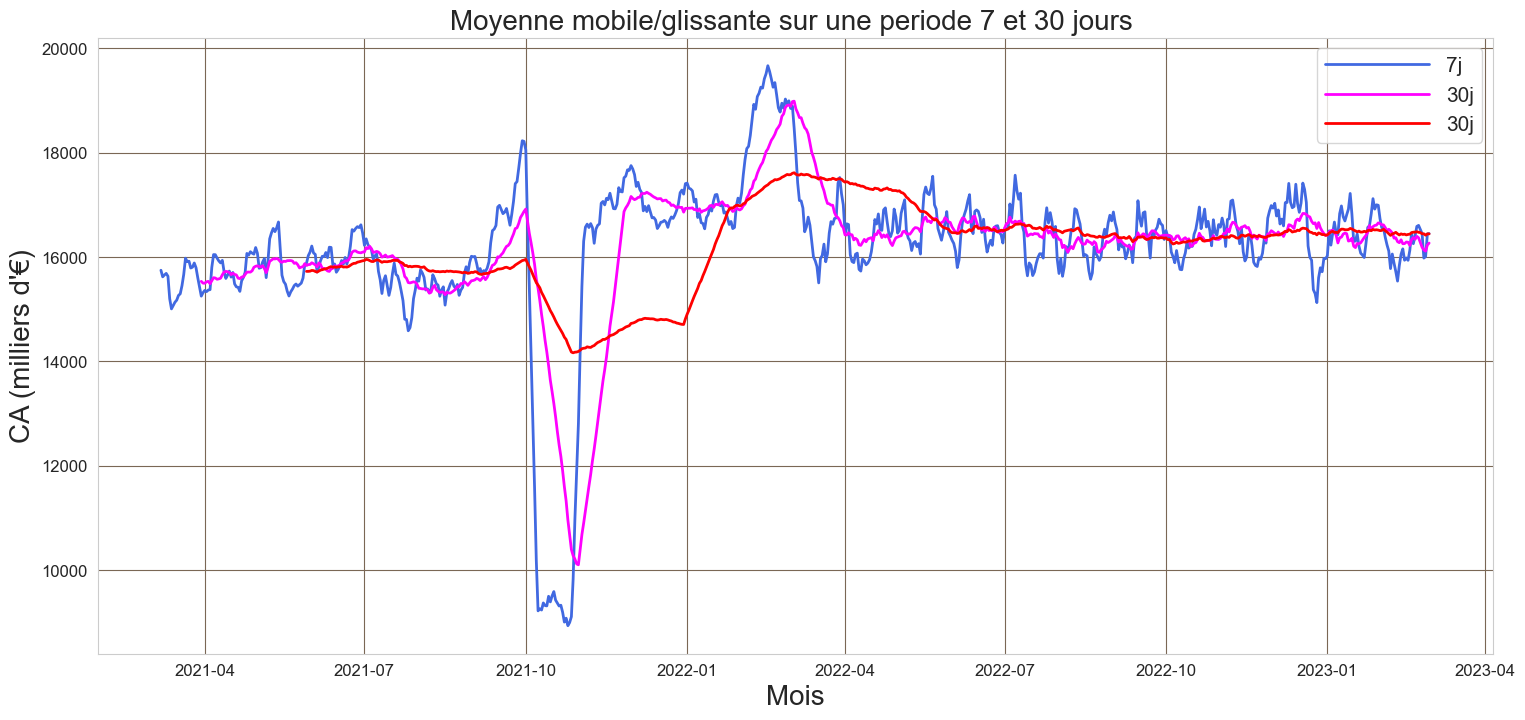

In [11]:
#Creation du graphique
plt.figure(figsize=(18, 8))
plt.title('Moyenne mobile/glissante sur une periode 7 et 30 jours ', fontsize='20')
plt.xlabel("Mois", fontsize='20')
plt.ylabel("CA (milliers d'€)", fontsize='20')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(ca_quotidien_3ans.rolling(7).mean(),
         label='7j', linewidth=2, color='royalblue')
plt.plot(ca_quotidien_3ans.rolling(30).mean(),
         label='30j', linewidth=2, color='fuchsia')
plt.plot(ca_quotidien_3ans.rolling(90).mean(),
         label='30j', linewidth=2, color='red')
plt.grid(color='#7A6755')
plt.legend(loc="upper right", fontsize=15, handlelength=5)
plt.show()


### Anomalie du mois d'octobre 2021 <a id="mo" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

#### Zoom sur le chiffre d'affaire journalier du mois d'octobre 2021


In [12]:
debut_date = '2021-10-01'
fin_date = '2021-10-31'
df10 = final_file.query('dates > @debut_date and dates < @fin_date')
nb_vent_octobre_2021 = df10.groupby(['dates', 'categ'], as_index=False)[
    'session_id'].count()

alt.Chart(nb_vent_octobre_2021).mark_bar().encode(
    x=alt.X('dates', axis=alt.Axis(title='year')),
    y=alt.Y('session_id', axis=alt.Axis(title='volume en euros')),
    color=alt.Color('categ:N', title='Catégorie')
).properties(title="volume Oct 2021 par jour et catégorie", width=700)


alt.Chart(...)

### Les Tops et les Flops <a id="tf" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

In [13]:
ca_prod = final_file.groupby(['id_prod', 'categ', 'sex']).agg(
    {"id_prod": "count", 'price': 'sum'})
ca_prod.rename(columns={"categ": "catégorie",
               "id_prod": "nombres_achats", "price": "CA"}, inplace=True)
top_prod_achat = ca_prod.sort_values(by='CA', ascending=False).head(10)
top_prod_nb_achat = ca_prod.sort_values(
    by='nombres_achats', ascending=False).head(10)
flop_prod_achat = ca_prod.sort_values(by='CA', ascending=True).head(10)
flop_prod_nb_achat = ca_prod.sort_values(
    by='nombres_achats', ascending=True).head(10)
print("LES TOPS\n", "(Les meilleurs CA par produit) \n\n",
      top_prod_achat, "\n*****************************************")
print("\n (Produits les plus vendus) \n\n", top_prod_nb_achat,
      "\n*****************************************")
print("LES FLOPS\n", "\n(Les plus mauvais CA par produit) \n\n",
      flop_prod_achat, "\n*****************************************")
print("\n (Produits les moins vendus)\n\n", flop_prod_nb_achat,
      "\n****************************************")


LES TOPS
 (Les meilleurs CA par produit) 

                    nombres_achats        CA
id_prod categ sex                          
2_159   2     m               338  49344.62
              f               310  45256.90
2_112   2     m               517  34933.69
2_135   2     f               502  34632.98
              m               481  33184.19
2_102   2     m               553  32704.42
2_112   2     f               435  29392.95
2_209   2     m               415  29045.85
2_39    2     m               500  28995.00
2_110   2     m               465  28946.25 
*****************************************

 (Produits les plus vendus) 

                    nombres_achats        CA
id_prod categ sex                          
1_369   1     m              1122  26916.78
1_417   1     f              1117  23445.83
1_369   1     f              1116  26772.84
1_414   1     f              1088  25927.04
              m              1088  25927.04
1_425   1     f              1079  18332.21
1

In [14]:
ft_ca_top_prod = final_file.groupby(['id_prod', 'categ', 'sex'], as_index=False)[
    'price'].sum().sort_values(by='price', ascending=False).head(10).reset_index(drop=True)
alt.Chart(ft_ca_top_prod).mark_bar().encode(
    x=alt.X('id_prod', axis=alt.Axis(title='Identifiant produit')),
    y=alt.Y('price', axis=alt.Axis(title='CA en euros')),
    color=alt.Color('sex:N', title='Sexe') 
).properties(title="Les meilleurs CA par produit", width=600)


alt.Chart(...)

In [15]:
ft_ca_flop_prod = final_file.groupby(['id_prod', 'categ', 'sex'], as_index=False)[
    'price'].count().sort_values(by='price', ascending=False).head(10).reset_index(drop=True)

alt.Chart(ft_ca_flop_prod).mark_bar().encode(
    x=alt.X('id_prod', axis=alt.Axis(title='Identifiant produit')),
    y=alt.Y('price', axis=alt.Axis(title='volume de vente')),
    color=alt.Color('sex:N', title='Sexe')
).properties(title="Produits les plus vendu", width=600)


alt.Chart(...)

### Les catégories de produits <a id="cp" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

#### Pourcentage des ventes par catégorie

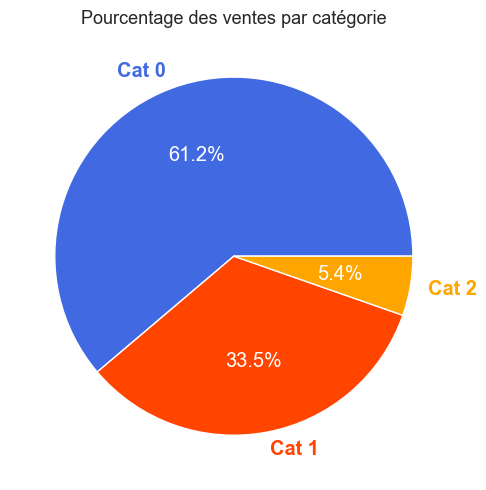

In [16]:
df11 = final_file[['categ', 'price']].groupby(
    'categ').agg({'price': ['count', 'sum']}).reset_index()
df11.columns = ['cat', 'nb_prod', 'ca']
fig, ax = plt.subplots(figsize=(10, 5))
labels = ['Cat 0', 'Cat 1', 'Cat 2']
colors = ['royalblue', 'orangered', 'orange']
patches, texts, pcts = ax.pie(
    df11.nb_prod, labels=labels, autopct='%.1f%%',
    textprops={'size': 'x-large'},
    startangle=0, colors=colors)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=500)
plt.setp(texts, fontweight=700)
ax.set_title('Pourcentage des ventes par catégorie', fontsize=13)

plt.tight_layout()


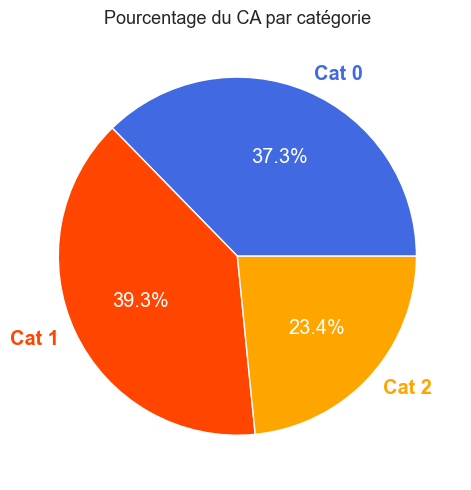

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
labels = ['Cat 0', 'Cat 1', 'Cat 2']
colors = ['royalblue', 'orangered', 'orange']
patches, texts, pcts = ax.pie(
    df11.ca, labels=labels, autopct='%.1f%%',
    textprops={'size': 'x-large'},
    startangle=0, colors=colors)
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=500)
plt.setp(texts, fontweight=700)
ax.set_title('Pourcentage du CA par catégorie', fontsize=13)

plt.tight_layout()


#### Répartition des prix par catégorie 

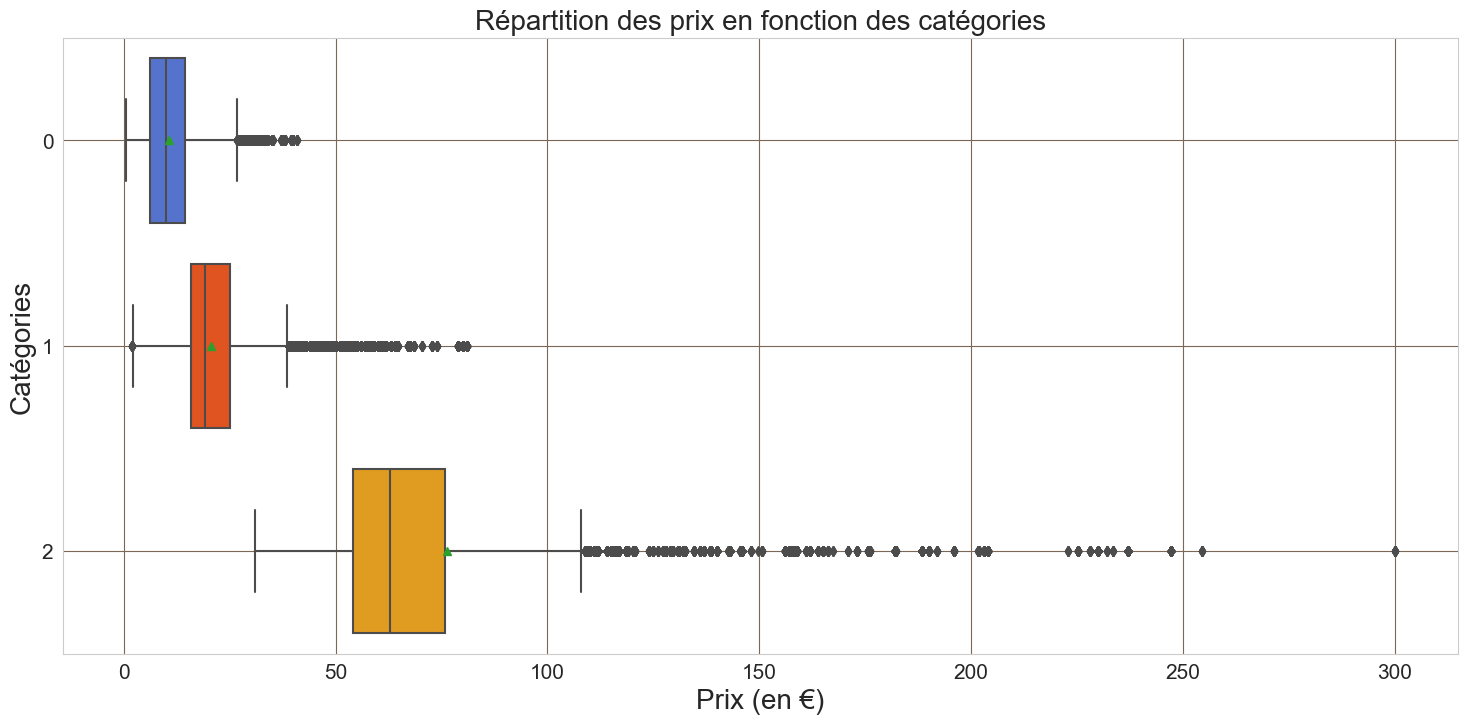

In [18]:
final_file.categ = final_file.categ.astype("category")
plt.figure(figsize=(18, 8))
my_pal = {0: "royalblue", 1: "orangered", 2: "orange"}
sns.boxplot(data=final_file, y="categ", x="price",
            showmeans=True, palette=my_pal)
plt.title('Répartition des prix en fonction des catégories', fontsize='20')
plt.xlabel('Prix (en €)', fontsize='20')
plt.ylabel("Catégories", fontsize='20')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='#7A6755')
plt.show()



### Profils des clients <a id="pc" class="btn btn-default" href="#sommaire"> retour au sommaire </a>
#### Mise en lumière des 4 clients principaux

In [19]:
# Répartition du CA par client
ca_client = final_file.groupby(['client_id'])[
    ['price']].sum().sort_values('price', ascending=False)
ca_client.head(10)


,price
client_id,
c_1609,323323.73
c_4958,287441.30
c_6714,153142.28
c_3454,113637.93
c_3263,5276.87
c_1570,5271.62
c_2899,5214.05
c_2140,5208.82
c_7319,5155.77


In [20]:
# Répartition de la quantité achetée par client
nb_achat_cli = final_file.groupby(['client_id'])[['session_id']].count(
).sort_values('session_id', ascending=False)
nb_achat_cli.head(10)


,session_id
client_id,
c_1609,25442
c_6714,9157
c_3454,6770
c_4958,5171
c_3263,403
c_2140,402
c_2595,392
c_2077,384
c_1637,380


#### Chiffre d'aiffaire et pourcentage des 4 clients

In [21]:
ca_4clients_important = ca_client.head(4).price.sum()
print("Ces 4 clients rapportent ", round(
    ca_4clients_important, 2), "euros de CA.")
ca_4clients_pourcentage = 100 * \
    ca_client.head(4).price.sum() / final_file.price.sum()
print("Et représentent", round(ca_4clients_pourcentage, 2), "% du CA total.")


Ces 4 clients rapportent  877545.24 euros de CA.
Et représentent 7.42 % du CA total.


In [22]:
# Créer la dataframe avec ces 4 gros clients
clients_important = final_file[(final_file.client_id == 'c_1609') |
                               (final_file.client_id == 'c_6714') |
                               (final_file.client_id == 'c_3454') |
                               (final_file.client_id == 'c_4958')]
clients_important.groupby(["age", 'sex', 'client_id'])['price'].sum()


age  sex  client_id
24   m    c_4958       287441.30
43   m    c_1609       323323.73
54   m    c_3454       113637.93
55   f    c_6714       153142.28
Name: price, dtype: float64

#### Création d'une base de données sans les 4 clients 

In [23]:
# Créer la nouvelle dataframe sans les données des 4 gros clients
final_file_sans_4clients = final_file.drop(
    clients_important.index).reset_index(drop=True)
final_file_sans_4clients.head()


,id_prod,date,price,categ,client_id,sex,age,session_id,day,month,year,dates
0,0_1421,2021-04-17,19.99,0,c_5152,f,37,s_21727,17,4,2021,2021-04-17
1,0_1421,2021-11-24,19.99,0,c_2167,f,63,s_124134,24,11,2021,2021-11-24
2,0_1421,2022-08-24,19.99,0,c_2167,f,63,s_257560,24,8,2022,2022-08-24
3,0_1421,2021-04-06,19.99,0,c_3060,m,52,s_16742,6,4,2021,2021-04-06
4,0_1421,2022-03-06,19.99,0,c_3060,m,52,s_175117,6,3,2022,2022-03-06


In [24]:
ca_sans_4clients = final_file_sans_4clients.groupby(
    ['client_id']).sum().sort_values(by='price', ascending=True).reset_index()
ca_clients_full = final_file.groupby(['client_id']).sum(
).sort_values(by='price', ascending=True).reset_index()


### Courbe de Lorentz <a id="cl" class="btn btn-default" href="#sommaire"> retour au sommaire </a>
##### La courbe de Lorenz est une représentation graphique qui montre comment les changements infimes dans les conditions initiales peuvent causer des différences considérables dans les résultats à long terme dans les systèmes dynamiques. 

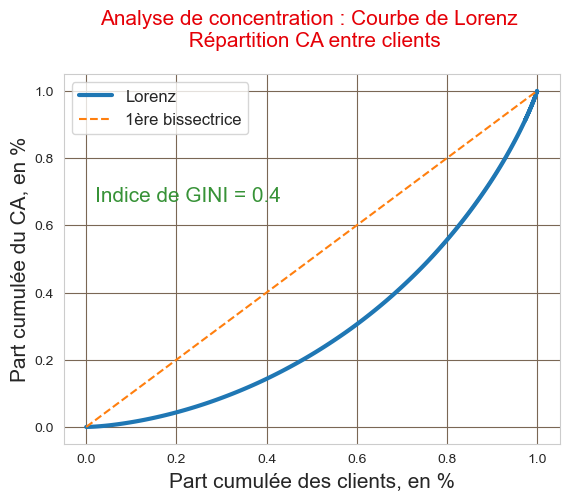


Constation : répartition inégale des achats entre client



In [25]:
# Somme achat par client
client_ca = ca_sans_4clients.groupby(
    ca_sans_4clients['client_id'])['price'].sum()

# Calcul Lorentz
lorenz = np.cumsum(np.sort(client_ca)) / client_ca.sum()
lorenz = np.append([0], lorenz)
taille = len(client_ca)

# Calcul indice de Gini
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2) / taille
S = 0.5 - AUC
gini_ca = round(2*S, 2)

### ---------------------------- Courbe de Lorentz --------------------------------------###
xaxis = np.linspace(0-1 / taille, 1 + 1 / taille, taille + 1)
plt.plot(xaxis, lorenz, drawstyle='steps-post', label='Lorenz', linewidth=3)
plt.plot([0, 1], [0, 1], label='1ère bissectrice',
         linewidth=1.5, linestyle='--')
plt.legend(fontsize=12)
plt.title("Analyse de concentration : Courbe de Lorenz \n Répartition CA entre clients",
          color='#E50007', fontsize=15, pad=20)
plt.xlabel("Part cumulée des clients, en %", fontsize=15)
plt.ylabel("Part cumulée du CA, en %", fontsize=15)
plt.grid(color='#7A6755')
plt.text(0.02, 0.67, 'Indice de GINI = ' +
         str(gini_ca), fontsize=15, color='#379237')
plt.show()
print('\nConstation : répartition inégale des achats entre client\n')



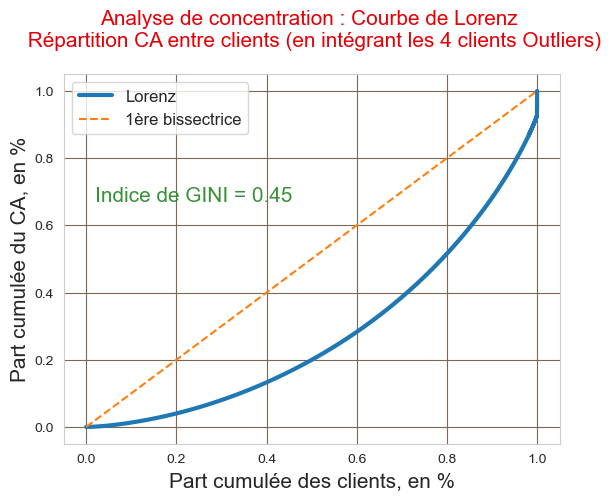


Constation : répartition encore plus inégale des achats entre client en intégrant les 4 clients Outliers



In [26]:
# Somme achat par client
client_ca_full = ca_clients_full.groupby(
    ca_clients_full['client_id'])['price'].sum()

# Calcul Lorentz
lorenz = np.cumsum(np.sort(client_ca_full)) / client_ca_full.sum()
lorenz = np.append([0], lorenz)
taille = len(client_ca_full)

# Calcul indice de Gini
AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2) / taille
S = 0.5 - AUC
gini_ca = round(2*S, 2)

### ---------------------------- Courbe de Lorentz --------------------------------------###
xaxis = np.linspace(0-1 / taille, 1 + 1 / taille, taille + 1)
plt.plot(xaxis, lorenz, drawstyle='steps-post', label='Lorenz', linewidth=3)
plt.plot([0, 1], [0, 1], label='1ère bissectrice',
         linewidth=1.5, linestyle='--')
plt.legend(fontsize=12)
plt.title("Analyse de concentration : Courbe de Lorenz \n Répartition CA entre clients (en intégrant les 4 clients Outliers)",
          color='#E50007', fontsize=15, pad=20)
plt.xlabel("Part cumulée des clients, en %", fontsize=15)
plt.ylabel("Part cumulée du CA, en %", fontsize=15)
plt.grid(color='#7A6755')
plt.text(0.02, 0.67, 'Indice de GINI = ' +
         str(gini_ca), fontsize=15, color='#379237')
plt.show()
print('\nConstation : répartition encore plus inégale des achats entre client en intégrant les 4 clients Outliers\n')


### Répartition des ages des clients 

In [27]:


final_file['tranche_age'] = pd.cut(x=final_file['age'], bins=[
                                   18, 29, 59,  99],labels=["18-29 Jeunes actifs", "29-59 Actifs", "59-99 Seniors"])
final_file_sans_4clients['tranche_age'] = pd.cut(
    x=final_file['age'], bins=[18, 29, 59,99],labels=["18-29 Jeunes actifs", "29-59 Actifs", "59-99 Seniors"])


<function matplotlib.pyplot.show(close=None, block=None)>

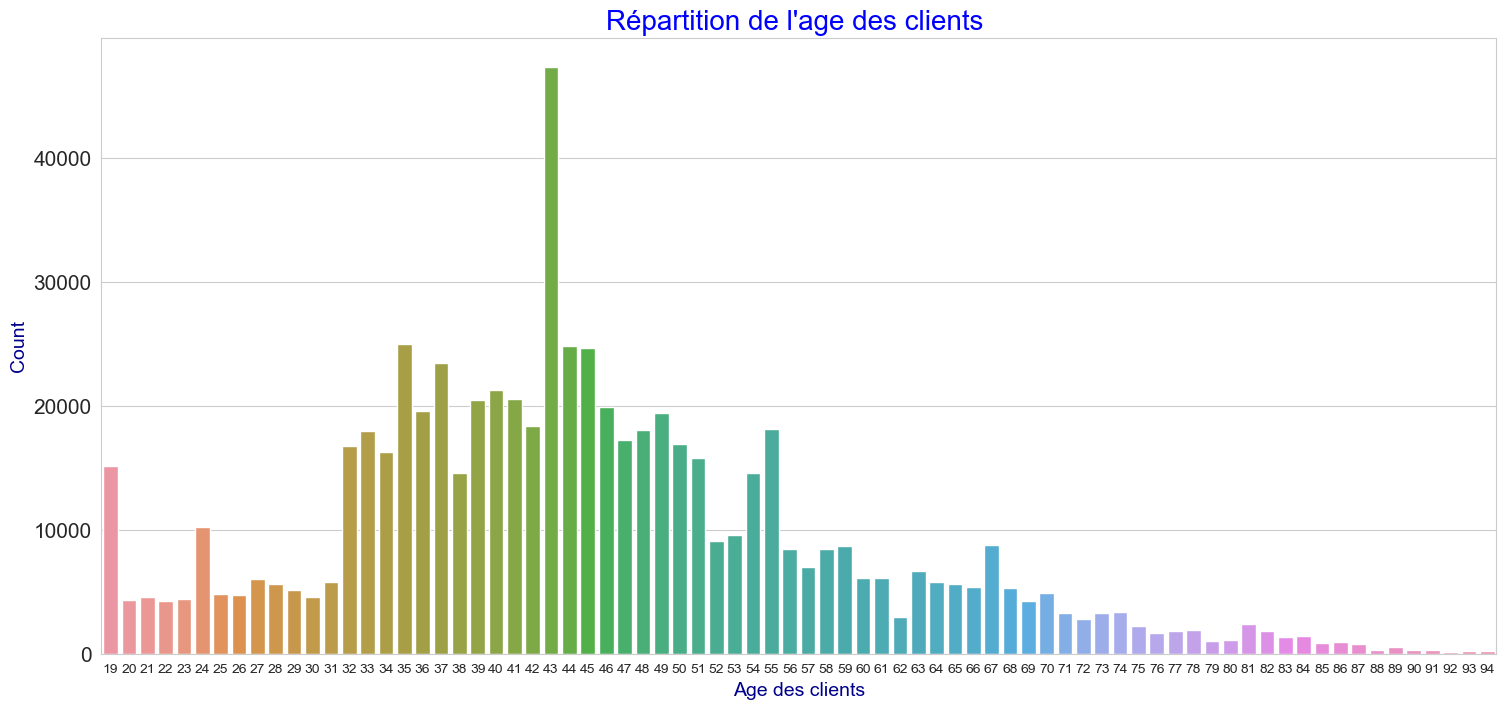

In [28]:
fig = plt.figure(figsize=(18, 8))
sns.countplot(x=final_file.age)
plt.xlabel("Age des clients", fontsize=14, color='darkblue')
plt.ylabel("Count", fontsize=14, color='darkblue')
plt.title("Répartition de l'age des clients ", fontsize=20, color='blue')
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show


Text(0.5, 1.0, 'Contribution au CA par tranche age')

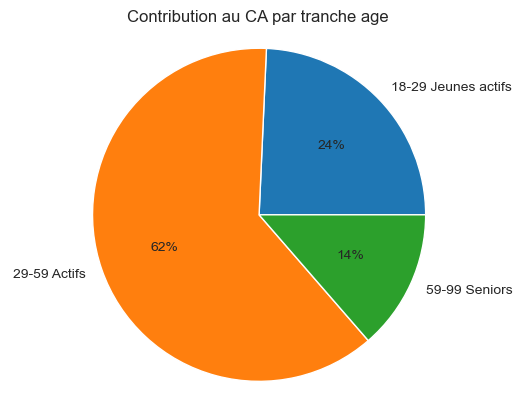

In [29]:
df13 = final_file[['tranche_age', 'price']].groupby(
    'tranche_age').sum().reset_index()
plt.pie(df13.price, autopct='%1.0f%%', labels=df13.tranche_age)
plt.axis('equal')
plt.title('Contribution au CA par tranche age')


### Gestion de l'anomalie du mois d'ocobre 2021
#### Décicions de supression des données clients

In [30]:
debut_date = '2021-10-01'
fin_date = '2021-10-31'
supp_oct_2021 = final_file.query('dates > @debut_date and dates < @fin_date')
final_file = final_file.drop(supp_oct_2021.index).reset_index(drop=True)


In [31]:
debut_date = '2021-09-01'
fin_date = '2021-11-30'
df12 = final_file.query('dates > @debut_date and dates < @fin_date')
top = df12.groupby(['dates', 'categ'], as_index=False)['price'].sum()

alt.Chart(top).mark_bar().encode(
    x=alt.X('dates', axis=alt.Axis(title='year')),
    y=alt.Y('price', axis=alt.Axis(title='CA en euros')),
    color=alt.Color('categ:N', title='Catégorie')
).properties(title="CA 2021 sur 3 mois (Septembre/Octobre/Novembre) par jour et catégorie", width=700)


alt.Chart(...)

# Analyse ( Demande de Julie)<a id="jul" class="btn btn-default" href="#sommaire"> retour au sommaire </a>
- Le lien entre le genre d’un client et les catégories des livres achetés ;
- Le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

***Pour cette partie, j'utilise les données en excluant les 4 gros clients qui pourraient fausser mes analyses.***


#### Répartition des genres et participation au chiffres

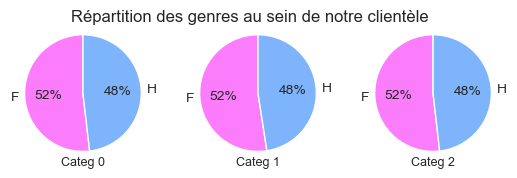

In [32]:
# Repartition des genres parmis nos clients:
by_categ = final_file_sans_4clients.groupby("categ")
repart_genre_cat0 = by_categ.get_group(0).groupby(["sex"])["client_id"].count()
repart_genre_cat1 = by_categ.get_group(1).groupby(["sex"])["client_id"].count()
repart_genre_cat2 = by_categ.get_group(2).groupby(["sex"])["client_id"].count()

fig, axes = plt.subplots(1, 3)
fig.subplots_adjust(hspace=0.4, top=1.5)

fig.suptitle("Répartition des genres au sein de notre clientèle")

axes[0].pie(repart_genre_cat0, labels=["F", "H"],  autopct='%1.0f%%', colors=["#fc7dfc", "#7db4fc"],
            startangle=90)
axes[0].set_title('Categ 0', fontsize=9, y=-0.05)

axes[1].pie(repart_genre_cat1, labels=["F", "H"], autopct='%1.0f%%', colors=["#fc7dfc", "#7db4fc"],
            startangle=90)
axes[1].set_title('Categ 1', fontsize=9, y=-0.05)

axes[2].pie(repart_genre_cat2, labels=["F", "H"], autopct='%1.0f%%', colors=["#fc7dfc", "#7db4fc"],
            startangle=90)
axes[2].set_title('Categ 2', fontsize=9, y=-0.05)

plt.show()


<Figure size 640x480 with 0 Axes>

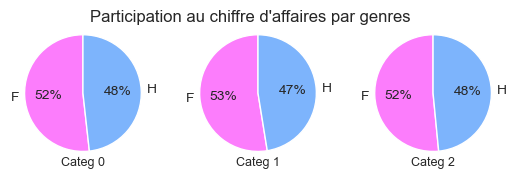

In [33]:
# Repartition des genres parmis nos clients:
repart_genre_cat0_ca = by_categ.get_group(0).groupby(["sex"])["price"].sum()
repart_genre_cat1_ca = by_categ.get_group(1).groupby(["sex"])["price"].sum()
repart_genre_cat2_ca = by_categ.get_group(2).groupby(["sex"])["price"].sum()
fig = plt.figure()
fig, axes = plt.subplots(1, 3)


fig.subplots_adjust(hspace=0.4, top=1.5)

fig.suptitle("Participation au chiffre d'affaires par genres")

axes[0].pie(repart_genre_cat0_ca, labels=["F", "H"],  autopct='%1.0f%%', colors=["#fc7dfc", "#7db4fc"],
            startangle=90)
axes[0].set_title('Categ 0', fontsize=9, y=-0.05)

axes[1].pie(repart_genre_cat1_ca, labels=["F", "H"], autopct='%1.0f%%', colors=["#fc7dfc", "#7db4fc"],
            startangle=90)
axes[1].set_title('Categ 1', fontsize=9, y=-0.05)

axes[2].pie(repart_genre_cat2_ca, labels=["F", "H"], autopct='%1.0f%%', colors=["#fc7dfc", "#7db4fc"],
            startangle=90)
axes[2].set_title('Categ 2', fontsize=9, y=-0.05)

plt.show()


#### Le lien entre le genre d’un client et les catégories de livres achetés

Vu que ce sont deux variables qualitative et catégoriel( 'genre' et 'catégories'), je les analyse avec le Chi-2:

- Création d'un tableau de contingence
- Calcul du coefficient de chi2
- Il est cependant possible de faire apparaître sur ce tableau les cases participants le plus à une possible corrélation, via un heatmap.

In [34]:
df_c = final_file_sans_4clients

tc_df = pd.crosstab(index=df_c['categ'], columns=df_c['sex'],
                    values=df_c['price'], aggfunc=sum, normalize= 'all')
tc_df


sex,f,m
categ,,
0,0.194421,0.181191
1,0.208358,0.188176
2,0.117437,0.110417


### Y a-t-il un lien entre le sexe des clients et les catégories de produits achetés ? <a id="q1" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

##### Test de Khi2
<p>Ce test est utilisé pour vérifier si les fréquences observées d'un événement correspondent aux fréquences attendues. 
<br/>Il est utilisé pour vérifier l'indépendance de deux variables.
<br/>Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:

H0: Les deux variables (le genre d’un client et les catégories des livres achetés ) sont indépendantes 
<br/>Il n'y a pas de lien entre le genre et la catégorie acheté

H1: les deux variables ne sont pas indépendantes
<br/>Il y a un lien entre le genre et la catégorie acheté</p>


In [35]:
# Effectuez le test
stat, p, dof, expected = stats.chi2_contingency(tc_df)
print("*******************Résultat*******************")
print("Test de chi-deux :")
print("- statistique : ", stat)
print("- p-value : ", p)


# Interprétez les résultats

if p > 0.05:
    print("Les variables sont indépendantes (p = {:.3f})".format(p))
else:
    print("Les variables sont dépendantes (p = {:.3f})".format(p))
print("\nSi la valeur de p est supérieure au seuil de signification, \nvous ne pouvez pas rejeter l'hypothèse nulle(H0), car vous ne possédez pas suffisamment de preuves\npour conclure que les variables sont associées.")


*******************Résultat*******************
Test de chi-deux :
- statistique :  7.483650190634347e-05
- p-value :  0.9999625824491009
Les variables sont indépendantes (p = 1.000)

Si la valeur de p est supérieure au seuil de signification, 
vous ne pouvez pas rejeter l'hypothèse nulle(H0), car vous ne possédez pas suffisamment de preuves
pour conclure que les variables sont associées.


<br/>Il n'y a pas de lien entre le genre et la catégorie acheté


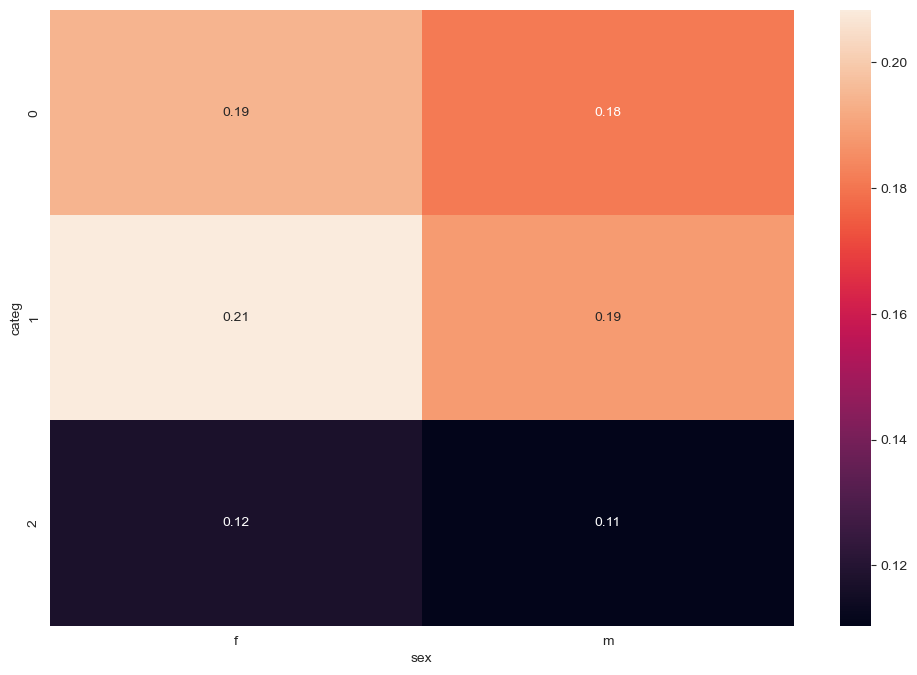

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(tc_df, annot=True)
plt.show()

### Y a-t-il un lien entre l'âge des clients et le montant total des achats ?<a id="q2" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

#### Test de Kolmogorov-Smirnov :
</br>Ce test est utilisé pour vérifier si les données d'un échantillon suivent une distribution normale.
</br>H0:  valeur de p est supérieure au seuil de signification, vous ne pouvez pas rejeter l'hypothèse nulle. Vous êtes en mesure de conclure que les données suivent une loi normale


</br>H1:  la valeur de p est inférieure ou égale au seuil de signification, vous pouvez rejeter l'hypothèse nulle et en conclure que vos données ne suivent pas une loi normale.


In [37]:

# Générez des données suivant une distribution normale
data = final_file_sans_4clients.groupby(['age'])['price'].sum().reset_index()
a = data['age']
b = data['price']
# Effectuez le test
statistic, p_value = stats.kstest(a, "norm")
print("*******************Résultat*******************")
print("Test de kolmogorov smirnov :")
print("- statistique : ", stat)
print("- p-value : ", p)

# Interprétez les résultats
if p < 0.05:
    print("H1:La distribution des données est significativement différente de la distribution normale (p = {:.10f})".format(
        p))
else:
    print("H0: La distribution des données est similaire à la distribution normale (p = {:.10f})".format(
        p))
print("\nSi la valeur de p est supérieure au seuil de signification, vous ne pouvez pas rejeter l'hypothèse nulle. \nVous n'êtes pas en mesure de conclure que les données ne suivent pas une loi normale")



*******************Résultat*******************
Test de kolmogorov smirnov :
- statistique :  7.483650190634347e-05
- p-value :  0.9999625824491009
H0: La distribution des données est similaire à la distribution normale (p = 0.9999625824)

Si la valeur de p est supérieure au seuil de signification, vous ne pouvez pas rejeter l'hypothèse nulle. 
Vous n'êtes pas en mesure de conclure que les données ne suivent pas une loi normale


Text(0.5, 1.0, 'Montant total des achats par âge')

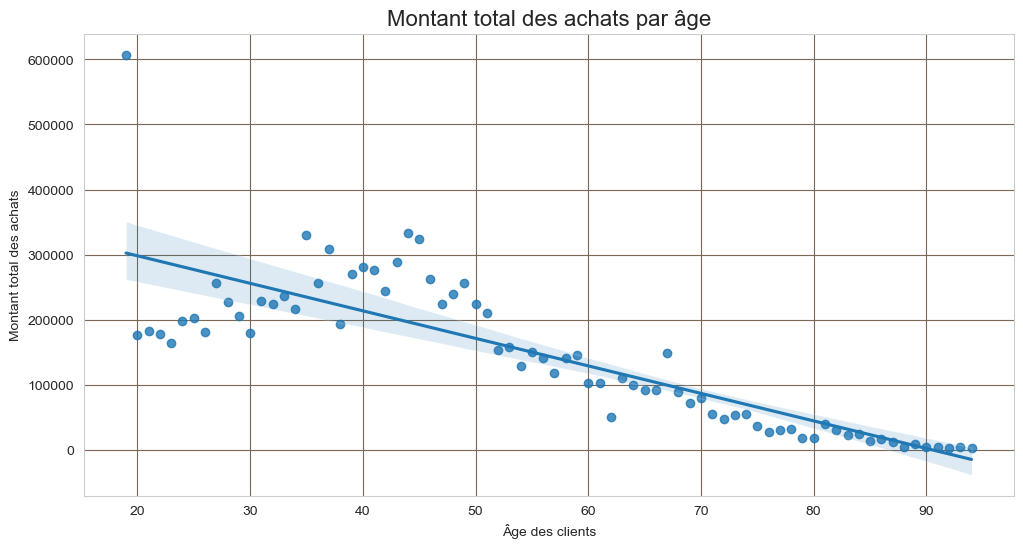

In [38]:
# Visualisation du CA en fonction d'âge des clients
plt.figure(figsize=(12, 6))
sns.regplot(x=a,y=b)
plt.ylabel('Montant total des achats')
plt.xlabel('Âge des clients')
plt.grid(color='#7A6755')
plt.title("Montant total des achats par âge", fontsize=16)


 Quand on observe le graphique plus précisemment, les clients de 35 à 50 ans,sont ceux qui achetent le plus de livre puis cela à tendance à diminiuer avec l'age qui augmente.

#### Test de corrélation de Spearmanr :
<br>Est utilisé pour mesurer la corrélation non linéaire entre deux variables. 
<br>Il est utilisé pour déterminer s'il existe une relation non linéaire entre deux variables.
<br>Le test de corrélation de Spearman vérifie s’il existe une relation monotone (c'est-à-dire croissante ou décroissante) entre deux variables quantitatives.
<br>L'hypothèse nulle (H0) : il n'y a pas de corrélation monotone entre les deux variables.
<br>L'hypothèse alternative (Ha) : il existe une corrélation monotone entre les deux variables.


In [58]:
# Lien entre l'age et le montant des achats:
age = final_file_sans_4clients.groupby(["age"])["client_id"].count()
total_achat_age = final_file_sans_4clients.groupby(["age"])["price"].sum()
x = age
y = total_achat_age

# Effectuez le test
corr, p_value = stats.spearmanr(x, y)
print("*******************Résultat*******************")
print("Test de Spearman :")
print("statistique : ", stat)
print("corrélation : ", corr)
print("p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("Il y a une relation de corrélation monotone entre les variables (p = {:.3f}, corr = {:.3f})".format(
        p_value, corr))
else:
    print("Il n'y a pas de relation de corrélation monotone entre les variables (p = {:.3f}, corr = {:.3f})".format(
        p_value, corr))







*******************Résultat*******************
Test de Spearman :
statistique :  7.483650190634347e-05
corrélation :  0.9098291182501709
p-value :  5.494988423129619e-30
Il y a une relation de corrélation monotone entre les variables (p = 0.000, corr = 0.910)


Conclusion:
J’obtient un coefficient de 0.91 ce qui représente une forte corrélation entre l’âge des clients et le montant total des achats


### Y a-t-il un lien entre l'âge des clients et la fréquence d’achat ?<a id="q3" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

In [40]:
age_ca = final_file_sans_4clients.groupby('age')['price'].agg(['count', 'sum']).sort_values('sum').reset_index()


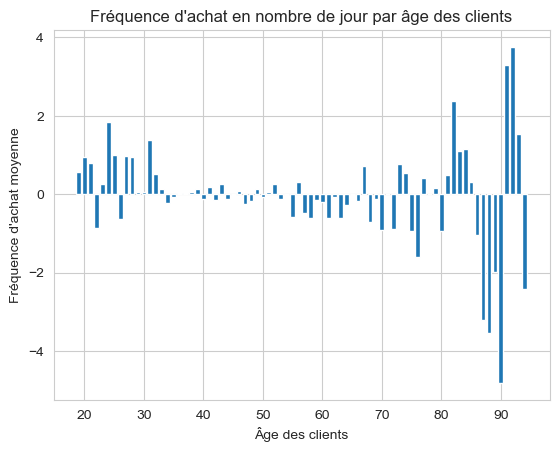

In [41]:

data1 =final_file_sans_4clients[["client_id","price", "dates","age"]]
data1['freq'] = data1.groupby('client_id')['dates'].transform(lambda x: x.diff().dt.days.fillna(0).astype(int))
# Calculer la fréquence d'achat moyenne par âge
freq_by_age = data1.groupby('age')['freq'].mean()
# Afficher un graphique à barres
plt.bar(freq_by_age.index, freq_by_age.values)
plt.xlabel('Âge des clients')
plt.ylabel('Fréquence d\'achat moyenne')
plt.title('Fréquence d\'achat en nombre de jour par âge des clients')
plt.show()

Ici nous allons utiliser le Test de Kolmogorov-Smirnov : </br>Ce test est utilisé pour vérifier si les données d'un échantillon suivent une distribution normale.

In [42]:
freq_by_age = data1.groupby('age', as_index=False)['freq'].mean()

a = freq_by_age['age']
b = freq_by_age['freq']
statistic, p_value = stats.kstest(a, "norm")
print("*******************Résultat*******************")
print("Test de kolmogorov smirnov :")
print("- statistique : ", statistic)
print("- p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("La distribution des données est significativement différente de la distribution normale (p = {:.10f})".format(
        p_value))
else:
    print("La distribution des données est similaire à la distribution normale (p = {:.10f})".format(
        p_value))


*******************Résultat*******************
Test de kolmogorov smirnov :
- statistique :  1.0
- p-value :  0.0
La distribution des données est significativement différente de la distribution normale (p = 0.0000000000)


In [43]:
# Effectuez le test
corr, p_value = stats.spearmanr(a, b)
print("*******************Résultat*******************")
print("Test de Spearman :")
print("statistique : ", stat)
print("corrélation : ", corr)
print("p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("Il y a une relation de corrélation monotone entre les variables (p = {:.3f}, corr = {:.3f})".format(
        p_value, corr))
else:
    print("Il n'y a pas de relation de corrélation monotone entre les variables (p = {:.3f}, corr = {:.3f})".format(
        p_value, corr))


*******************Résultat*******************
Test de Spearman :
statistique :  7.483650190634347e-05
corrélation :  -0.2263568010936432
p-value :  0.04927205995055875
Il y a une relation de corrélation monotone entre les variables (p = 0.049, corr = -0.226)


### Y a-t-il un lien entre l'âge des clients et la taille du panier moyen ?<a id="q4" class="btn btn-default" href="#sommaire"> retour au sommaire </a>

In [44]:
age_panier = final_file_sans_4clients.groupby(['age'], as_index=False).agg(
    nb_panier=('session_id', 'nunique'), somme_panier=('price', 'sum'))
age_panier['moy_panier'] = age_panier['somme_panier'] / age_panier['nb_panier']
age_panier['moy_panier']


0     70.702407
1     68.962922
2     70.548631
3     73.289930
4     67.958551
        ...    
71    22.550858
72    24.481505
73    29.327604
74    27.492260
75    24.043657
Name: moy_panier, Length: 76, dtype: float64

In [45]:
# Calculer le panier moyen par client
panier_moyen_par_client = final_file_sans_4clients.groupby('client_id')['price'].mean()

# Joindre avec l'âge des clients
panier_moyen_et_age = final_file_sans_4clients[['client_id', 'age']].drop_duplicates().set_index('client_id').join(panier_moyen_par_client)

# Calculer la moyenne du panier moyen par tranche d'âge
moyenne_panier_moyen_par_age = panier_moyen_et_age.groupby('age', as_index=False)['price'].mean()




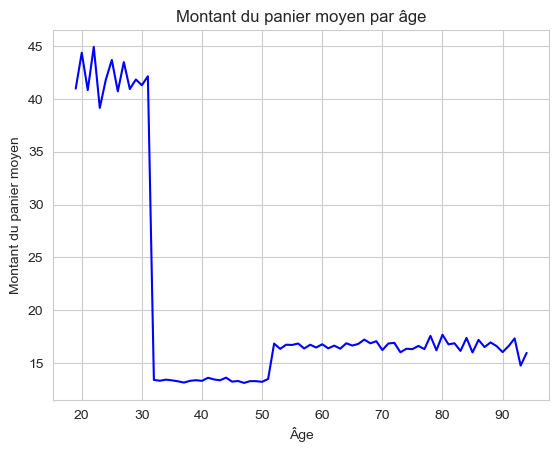

In [46]:

# Création du graphique
plt.plot(moyenne_panier_moyen_par_age['age'], moyenne_panier_moyen_par_age['price'], color='blue')
plt.title('Montant du panier moyen par âge')
plt.xlabel('Âge')
plt.ylabel('Montant du panier moyen')
plt.show()

Ici nous allons utiliser le Test de Kolmogorov-Smirnov : </br>Ce test est utilisé pour vérifier si les données d'un échantillon suivent une distribution normale.

In [47]:

a= age_panier['age']
b= age_panier['moy_panier']
statistic, p_value = stats.kstest(a,b,'norm')
print("*******************Résultat*******************")
print("Test de kolmogorov smirnov :")
print("- statistique : ", statistic)
print("- p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("La distribution des données est significativement différente de la distribution normale (p = {:.10f})".format(p_value))
else:
    print("La distribution des données est similaire à la distribution normale (p = {:.10f})".format(p_value))



*******************Résultat*******************
Test de kolmogorov smirnov :
- statistique :  0.6447368421052632
- p-value :  3.468342515473334e-15
La distribution des données est significativement différente de la distribution normale (p = 0.0000000000)


In [48]:
# Effectuez le test
corr, p_value = stats.spearmanr(a, b)
print("*******************Résultat*******************")
print("Test de Spearman :")
print("statistique : ", stat)
print("corrélation : ", corr)
print("p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("Il y a une relation de corrélation monotone entre les variables (p = {:.3f}, corr = {:.3f})".format(
        p_value, corr))
else:
    print("Il n'y a pas de relation de corrélation monotone entre les variables (p = {:.3f}, corr = {:.3f})".format(
        p_value, corr))



*******************Résultat*******************
Test de Spearman :
statistique :  7.483650190634347e-05
corrélation :  -0.7658509911141489
p-value :  7.696392384453697e-16
Il y a une relation de corrélation monotone entre les variables (p = 0.000, corr = -0.766)


### Y a-t-il un lien entre l'âge des clients et les catégories des livres achetés ?<a id="q5" class="btn btn-default" href="#sommaire"> retour au sommaire </a>
Pour tester une variable quantitative (âge) et une variable  qualitative (catégories) , j'utilise: 
- Visualisation avec boxplots
- Vérification de la possibilité d'utiliser ANOVA
- Test de Kruskal-Wallis
- Test  ANOVA

In [49]:
age_categ = final_file_sans_4clients.groupby(['age','categ'], as_index = False).agg(nb = ('categ', 'count'), ca = ('price', 'sum'))
age_categ_0 = age_categ.loc[age_categ['categ'] == 0,:]
age_categ_1 = age_categ.loc[age_categ['categ'] == 1,:]
age_categ_2 = age_categ.loc[age_categ['categ'] == 2,:]


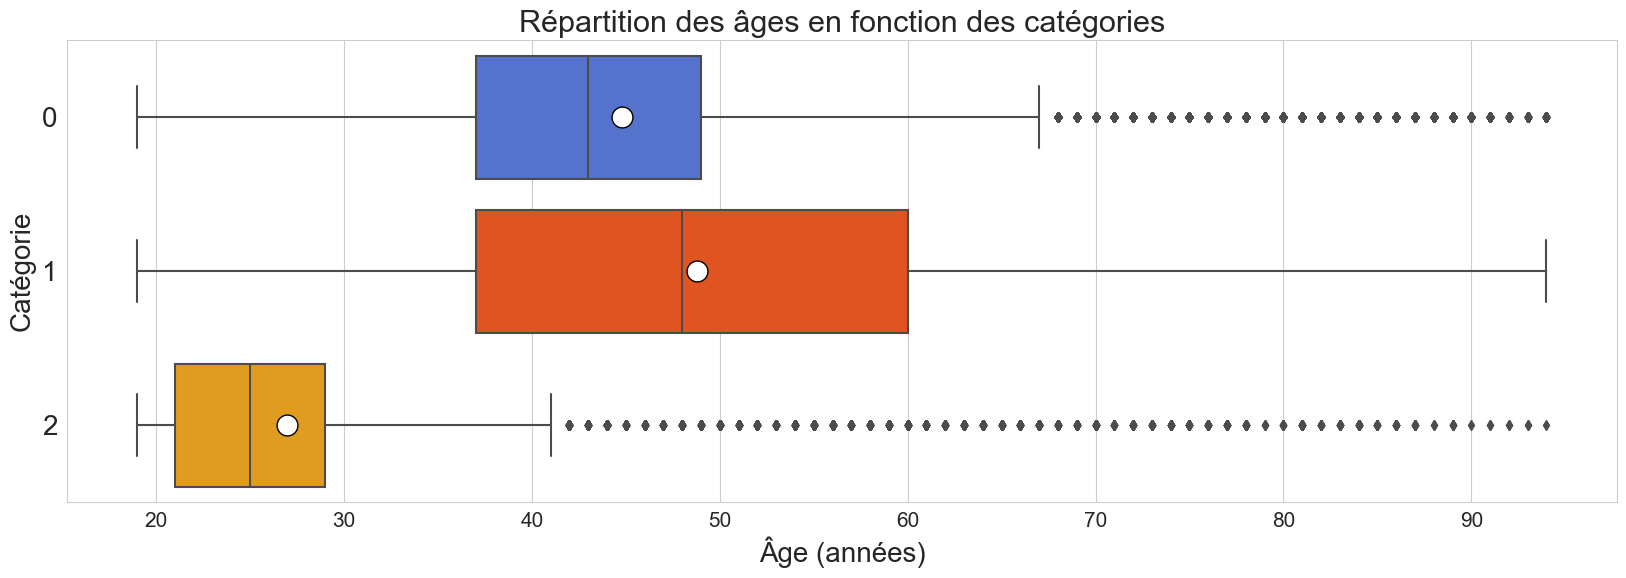

In [50]:
X = "age"  # quantitative
Y = "categ"  # qualitative

meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'white', 'markersize': "15"}
my_pal = {0: "royalblue", 1: "orangered", 2: "orange"}
plt.figure(figsize=(20, 6))
plt.title("Répartition des âges en fonction des catégories", fontsize='22')
sns.boxplot(x=final_file_sans_4clients[X], y=final_file_sans_4clients[Y],
            showmeans=True, meanprops=meanprops, palette=my_pal)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel("Âge (années)", fontsize=20)
plt.ylabel("Catégorie", fontsize=20)

plt.show()

In [51]:
a0= age_categ_0['age']
statistic, p_value = stats.kstest(a0,'norm')
print("*******************Résultat*******************")
print("Test de kolmogorov smirnov :")
print("- statistique : ", statistic)
print("- p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("La distribution des données est significativement différente de la distribution normale (p = {:.10f})".format(p_value))
else:
    print("La distribution des données est similaire à la distribution normale (p = {:.10f})".format(p_value))

*******************Résultat*******************
Test de kolmogorov smirnov :
- statistique :  1.0
- p-value :  0.0
La distribution des données est significativement différente de la distribution normale (p = 0.0000000000)


In [52]:
a1= age_categ_1['age']
statistic, p_value = stats.kstest(a1,'norm')
print("*******************Résultat*******************")
print("Test de kolmogorov smirnov :")
print("- statistique : ", statistic)
print("- p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("La distribution des données est significativement différente de la distribution normale (p = {:.10f})".format(p_value))
else:
    print("La distribution des données est similaire à la distribution normale (p = {:.10f})".format(p_value))

*******************Résultat*******************
Test de kolmogorov smirnov :
- statistique :  1.0
- p-value :  0.0
La distribution des données est significativement différente de la distribution normale (p = 0.0000000000)


In [53]:
a2= age_categ_2['age']
statistic, p_value = stats.kstest(a2,'norm')
print("*******************Résultat*******************")
print("Test de kolmogorov smirnov :")
print("- statistique : ", statistic)
print("- p-value : ", p_value)
# Interprétez les résultats
if p_value < 0.05:
    print("La distribution des données est significativement différente de la distribution normale (p = {:.10f})".format(p_value))
else:
    print("La distribution des données est similaire à la distribution normale (p = {:.10f})".format(p_value))

*******************Résultat*******************
Test de kolmogorov smirnov :
- statistique :  1.0
- p-value :  0.0
La distribution des données est significativement différente de la distribution normale (p = 0.0000000000)


Le test de Levene <br>consiste à vérifier si la variance des différences entre les observations et la moyenne est la même pour chaque groupe.<br> Si la variance est la même pour chaque groupe, alors on peut utiliser un test paramétrique pour comparer les moyennes.<br> Si la variance n'est pas la même pour chaque groupe, alors un test non paramétrique, comme le test de Kruskal-Wallis, doit être utilisé pour comparer les moyennes.
<br>H0: les variances de chaque groupe de catégorie sont égaux
<br>H1: les variances de chaque groupe de catégorie ne sont pas égaux

In [54]:
#from scipy.stats import 
statistic, p_value = levene(age_categ_0['ca'],age_categ_1['ca'],age_categ_2['ca'], center='mean')
print("*******************Résultat*******************")
print("Test de Levene :")
print("statistique : ", statistic)
print("corrélation : ", corr)
print("p-value : ", p_value)
if p_value < 0.05:
    print("La pvaleur suggère que les populations n'ont pas des variances égales et nous pouvons rejeter hypothese alternative(p = {:.10f})".format(p_value))
else:
    print("La pvaleur suggère que les populations ont des variances égales et ne nous pouvons pas rejeter hypothese null (p = {:.10f})".format(p_value))


*******************Résultat*******************
Test de Levene :
statistique :  6.677338596097633
corrélation :  -0.7658509911141489
p-value :  0.0015235947376924562
La pvaleur suggère que les populations n'ont pas des variances égales et nous pouvons rejeter hypothese alternative(p = 0.0015235947)


Le test de Kruskall-Wallis <br>est un test statistique non paramétrique utilisé pour déterminer s'il existe une différence significative entre les médianes de deux ou plusieurs groupes. Il est utilisé lorsque les données ne suivent pas une distribution normale et que les variances des groupes ne sont pas égales. Le test compare le rang des données dans chaque groupe, plutôt que les valeurs de données brutes. L'hypothèse nulle du test est qu'il n'y a pas de différence entre les médianes des groupes, et l'hypothèse alternative est qu'il existe au moins une paire de groupes avec des médianes différentes. Le test produit une valeur p, qui est utilisée pour déterminer la signification des résultats.

Test de Kruskal-Wallis
- Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
<br>H0: les médians de chaque groupe de catégorie sont égaux
<br>H1: les médians de chaque groupe de catégorie ne sont pas égaux




In [55]:

statistic, p_value = stats.kruskal(age_categ_0['ca'],age_categ_1['ca'],age_categ_2['ca'])
print("*******************Résultat*******************")
print("Test de Kruskal-Wallis :")
print("statistique : ", statistic)
print("corrélation : ", corr)
print("p-value : ", p_value)

if p_value < 0.05:
    print("La pvaleur suggère que les populations n'ont pas de médian egaux pour chaque groupe et nous pouvons rejeter hypothese null(p = {:.10f})".format(p_value),statistic)
else:
    print("La pvaleur suggère que les populations ont des médians egaux pour chaque groupe et ne nous pouvons pas rejeter hypothese null (p = {:.10f})".format(p_value))


*******************Résultat*******************
Test de Kruskal-Wallis :
statistique :  48.421252222719545
corrélation :  -0.7658509911141489
p-value :  3.0581492464814e-11
La pvaleur suggère que les populations n'ont pas de médian egaux pour chaque groupe et nous pouvons rejeter hypothese null(p = 0.0000000000) 48.421252222719545


Test de ANOVA

- Test de la moyenne (f_oneway)
Avec un risque premier alpha de 5%, on émets les deux hypothèses suivantes:
<br>H0: les moyennes de chaque groupe de catégorie sont égaux
<br>H1: les moyennes de chaque groupe de catégorie ne sont pas égaux


In [56]:
# A titre expérimentale
fvalue, pvalue= stats.f_oneway(age_categ_0['ca'],age_categ_1['ca'],age_categ_2['ca'])
print("*******************Résultat*******************")
print("Test d'ANOVA:")
print("statistique : ", statistic)
print("corrélation : ", corr)
print("p-value : ", p_value)
print('f_value:',fvalue)
if pvalue < 0.05:
    print("La pvaleur suggère que les populations n'ont pas des moyennes égales pour chaque groupe et  nous pouvons rejeter hypothese null(p = {:.10f})".format(pvalue))
else:
    print("La pvaleur suggère que les populations ont des moyennes égales pour chaque groupe et ne nous pouvons pas rejeter hypothese null (p = {:.10f})".format(pvalue))


*******************Résultat*******************
Test d'ANOVA:
statistique :  48.421252222719545
corrélation :  -0.7658509911141489
p-value :  3.0581492464814e-11
f_value: 3.670587953792756
La pvaleur suggère que les populations n'ont pas des moyennes égales pour chaque groupe et  nous pouvons rejeter hypothese null(p = 0.0269983793)
